Heart Disease Detection
fun part :- This dataeset has only numerical values (less or no preprocessing)

In [19]:
import pandas as pd

df = pd.read_csv('heart.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [20]:
from sklearn.model_selection import train_test_split

X = df.drop(['target'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.4, random_state=9)  # giving less data for training

Scale insensitive

In [21]:
# Random forest does not care for scale

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train,y_train)

RandomForestClassifier()

In [22]:
# Gaussian NB does not care for scale

from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train,y_train)

GaussianNB()

In [23]:
# Gradient Boosting classifierc are for scale

from sklearn.ensemble import GradientBoostingClassifier

gb_clf = RandomForestClassifier()
gb_clf.fit(X_train,y_train)

RandomForestClassifier()

Scale sensitive models

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [26]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train_scaled, y_train)

LogisticRegression()

In [27]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_scaled, y_train)

SVC()

In [28]:
forest.score(X_test,y_test)

0.959349593495935

In [29]:
nb_clf.score(X_test, y_test)

0.8406504065040651

In [30]:
gb_clf.score(X_test, y_test)

0.959349593495935

In [31]:
knn.score(X_test_scaled, y_test)

0.8569105691056911

In [32]:
log.score(X_test_scaled, y_test)

0.8455284552845529

In [33]:
svc.score(X_test_scaled, y_test)

0.9089430894308943

In medical domain,
if someone is healthy and we predict heart disease, then not an issue
but if someone is not healthy and we predict he is healthy, then that is an issue

So Recall is more important
this is like finding all the patients with heart disease

In [36]:
from sklearn.metrics import recall_score

y_preds = forest.predict(X_test)
print("Forest recall", recall_score(y_test, y_preds))

y_preds = nb_clf.predict(X_test)
print("Naive recall", recall_score(y_test, y_preds))

y_preds = gb_clf.predict(X_test)
print("Gradient recall", recall_score(y_test, y_preds))

y_preds = knn.predict(X_test_scaled)
print("knn recall", recall_score(y_test, y_preds))

y_preds = log.predict(X_test_scaled)
print("log", recall_score(y_test, y_preds))

y_preds = svc.predict(X_test_scaled)
print("svc recall", recall_score(y_test, y_preds))

Forest recall 0.952076677316294
Naive recall 0.8881789137380192
Gradient recall 0.9424920127795527
knn recall 0.8849840255591054
log 0.8977635782747604
svc recall 0.9329073482428115


ROC plots false +ve rate in x-axis and True +ve axis in y-axis (Recall)

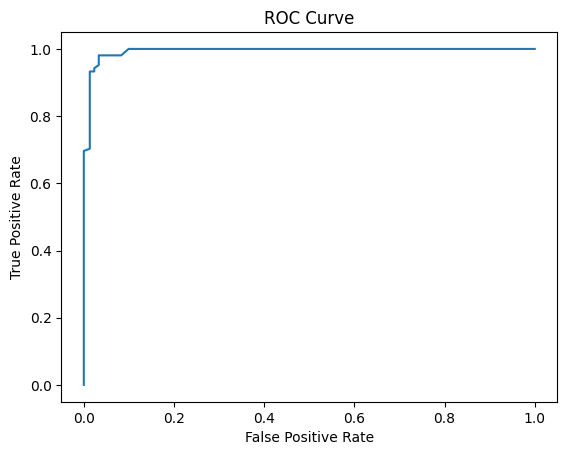

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = forest.predict_proba(X_test)[:,1]

fpr, tpr, threshold = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

This is a good model for Recall,
Recall is achieving 100% when less than 20% of False positive rate

In [44]:
roc_auc_score(y_test, y_probs)

np.float64(0.9937213041914394)

Hyperparameter training (Grid Search)

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators':[100,200,500],
    'max_depth':[None, 10,20,30],
    'min_samples_split':[1,2,4],
    'max_features':['sqrt', 'log2', None]
}

forest = RandomForestClassifier(n_jobs=-1, random_state=9) # n_jobs = -1 means parallelization

grid_search = GridSearchCV(forest, param_grid, cv=3, n_jobs=-1)

In [46]:
grid_search.fit(X_train, y_train)

c:\Users\INRAJR\honeypot\insurance\Regression-Example\reg\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
108 fits failed out of a total of 324.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\INRAJR\honeypot\insurance\Regression-Example\reg\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\INRAJR\honeypot\insurance\Regression-Example\reg\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\INRAJR\honeypot\insurance\Regression-Example\reg\Lib\site-packages\

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=9),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_split': [1, 2, 4],
                         'n_estimators': [100, 200, 500]})

In [47]:
best_forest = grid_search.best_estimator_

In [48]:
best_forest

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=9)

Feature Importances

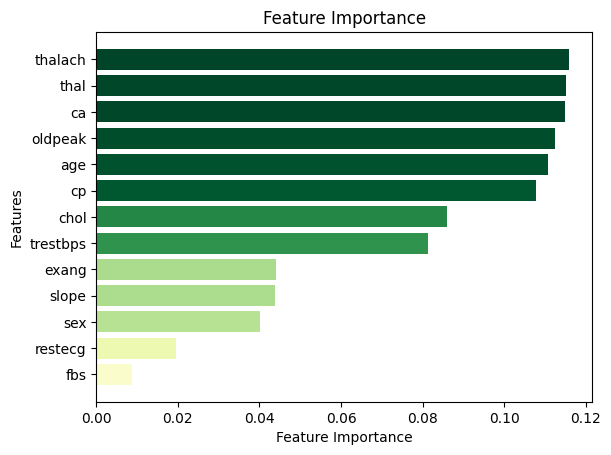

In [49]:
import numpy as np

feature_importances = best_forest.feature_importances_
features = best_forest.feature_names_in_

sorted_idx = np.argsort(feature_importances)
sorted_features = features[sorted_idx]
sorted_importances = feature_importances[sorted_idx]


colors = plt.cm.YlGn(sorted_importances/ max(sorted_importances))

plt.barh(sorted_features, sorted_importances, color=colors)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()


correlation on data
Highly +ve and Highly -ve are important

<Axes: >

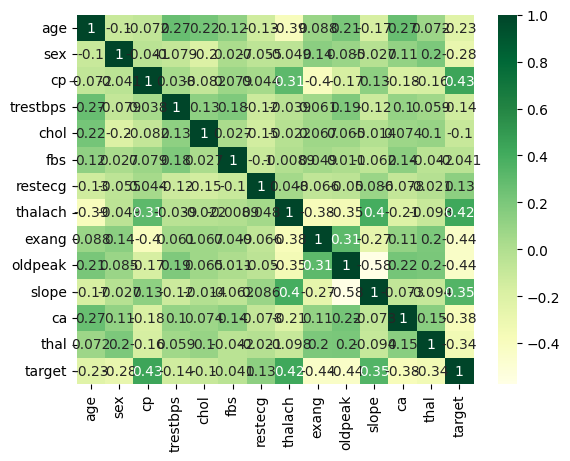

In [55]:
import seaborn as sns 

plt.Figure(figsize=(50,50))
sns.heatmap(df.corr(), annot=True, cmap='YlGn')